# Problem Statement
- Startup developed a light weight water bottle
- Target Audience - School Kids aged 6-16.
- As a Marketing Associate, identify the most effective channels and craft compelling content
- Budget - 2000 USD

Build an agentic system that can help with the same using sequential chat.

In [14]:
import autogen
from autogen import AssistantAgent
from IPython.display import display, Markdown

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

# Sequential Chat

In [18]:
strategy_config_list = {
    "config_list": [{"model": "gpt-4o-mini", "temperature": 0.3}]
}

In [19]:
strategy_creator = autogen.AssistantAgent(
    name="strategy_creator",
    llm_config=strategy_config_list,
    system_message=""""You are a logical marketing manager tasked with crafting a marketing strategy. 
    Gather details on the product, target audience, and budget. Then identify the best marketing channels 
    which will get that product maximum visibility."
    """
)

In [20]:
content_config_list = {
    "config_list": [{"model": "gpt-4o-mini", "temperature": 0.6}]
}

In [21]:
content_creator = autogen.AssistantAgent(
    name="content_creator",
    llm_config=content_config_list,
    system_message=""""You are Content Executor, a creative AI agent. 
    Your task is to craft engaging, channel-specific content that aligns with the marketing strategy, 
    ensuring it captures attention and resonates with the target audience."
    """
)

Define the user proxy agent:
1. Save UserProxyAgent in the user_proxy variable and name it "User".
2. **human_input_mode** - Sets  frequency at which the user can input. 
3. **is_termination_msg** - A lambda function which determines whether a message is a termination message. In our case:
    - The message has content (x.get("content", "")), and
    - The content ends with the string "TERMINATE" after stripping any trailing whitespace.
4. Finally **code_execution=False** disables code execution capability for this proxy agent.

In [22]:
user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="ALWAYS",
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config=False)

In [23]:
product_details = [
    """Water bottle for school children under the age of 16 years. The marketing budget is 2000 USD""",
]

In [24]:
writing_task = ["""Write an engaging content for the mentioned product and channel"""]

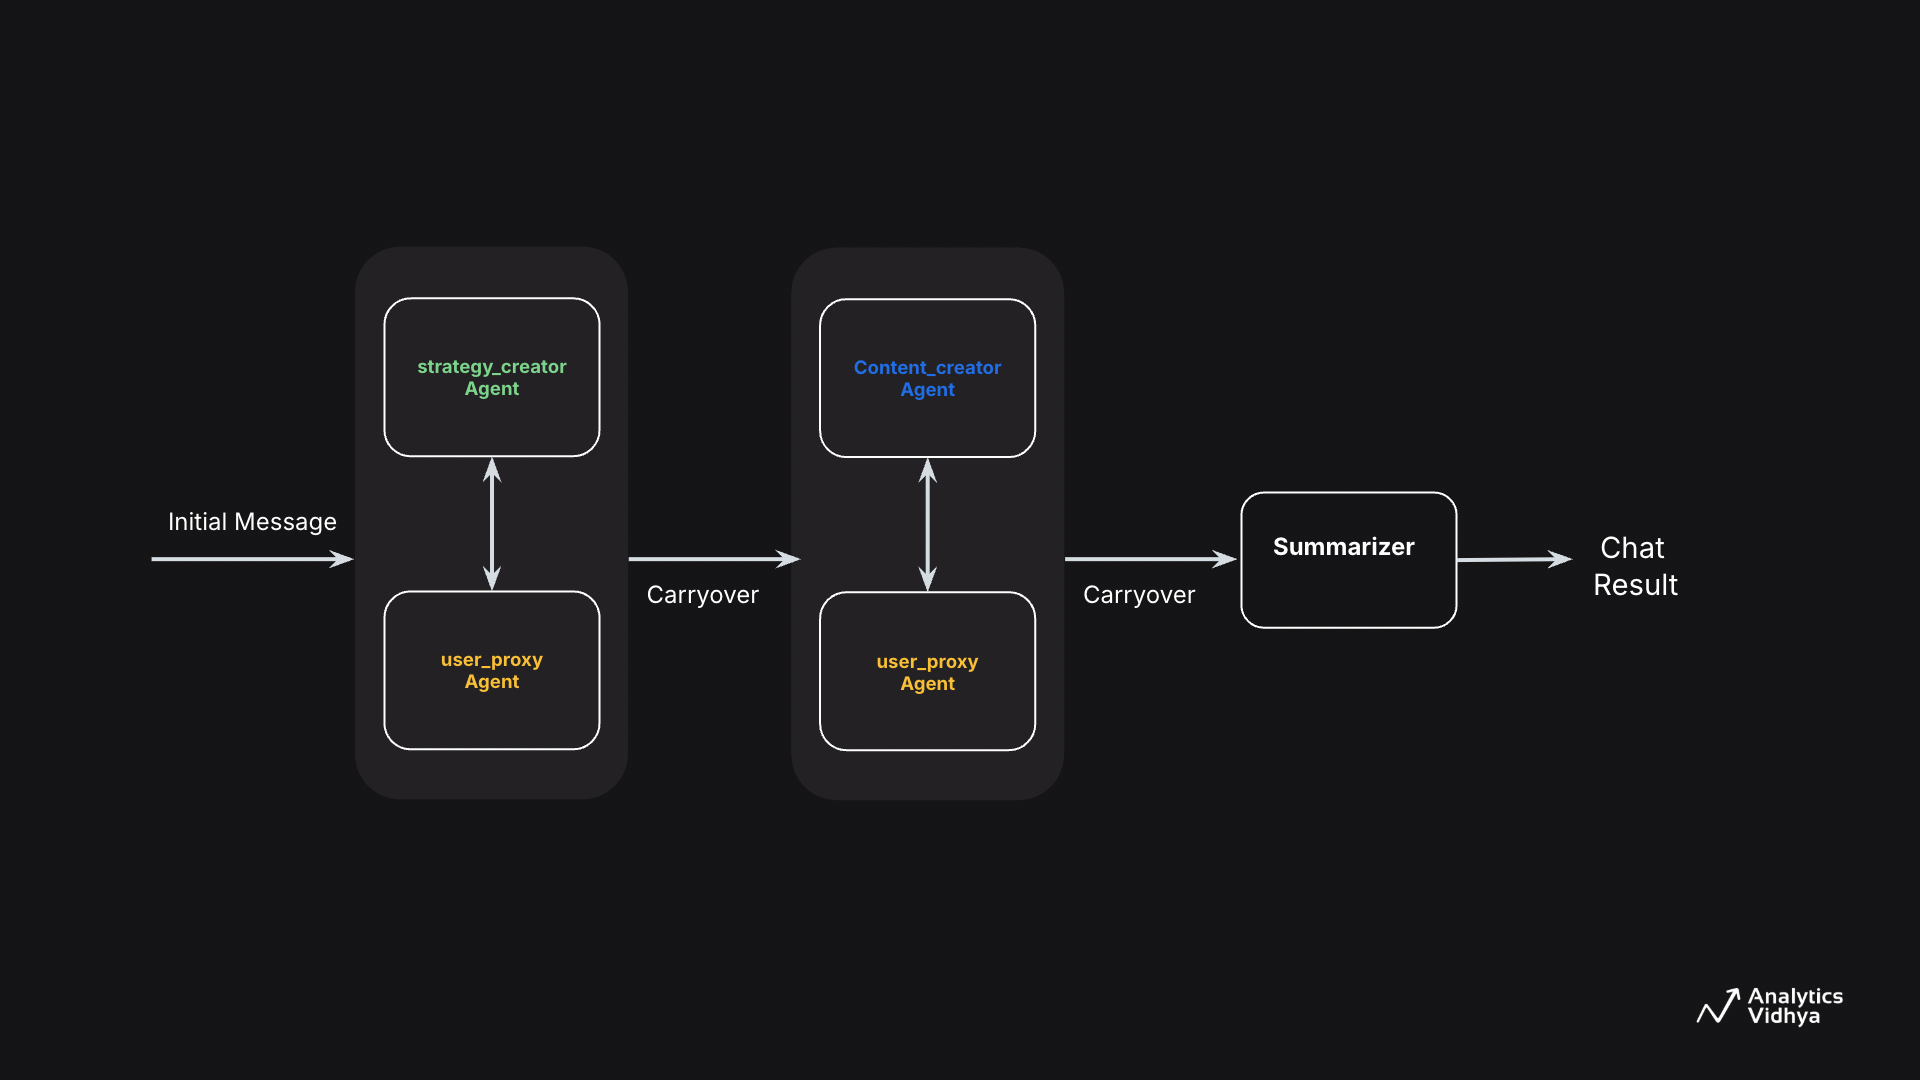

1. First, **user_proxy** agent sends the message to **strategy_creator** agent. The message sent by user_proxy agent is saved in the "product_details" list. We will be clearing the history of the conversation and printing the the conversation between the agents by setting "silence=False".

2. Then the summary of the chat above is carried over to the next conversation which happens between the **user_proxy** agent and **content_creator** agent. The user_proxy agent sends the message stored in the "writer_task" skill. And we generate the summary as the last message.

In [27]:
chat_results = autogen.initiate_chats(
    [
        {
            "sender": user_proxy,
            "recipient": strategy_creator,
            "message": product_details[0],
            "clear_history": True,
            "silent": False,
            "summary_method": "last_msg",
        },
        {
            "sender": user_proxy,
            "recipient": content_creator,
            "message": writing_task[0],
            "summary_method": "last_msg",
        },
    ]
)


********************************************************************************
Starting a new chat....

********************************************************************************
User (to strategy_creator):

Water bottle for school children under the age of 16 years. The marketing budget is 2000 USD

--------------------------------------------------------------------------------
strategy_creator (to User):

Great! Let's break down the details to create an effective marketing strategy for the water bottle aimed at school children under the age of 16.

### Product Details:
- **Product**: Water bottle
- **Target Audience**: School children aged 6-16 years
- **Key Features**: 
  - Durable and lightweight
  - BPA-free and safe for children
  - Fun designs and colors (possibly customizable)
  - Easy to clean and refill
  - Leak-proof and spill-proof
  - Eco-friendly materials

### Target Audience:
- **Primary Audience**: Children aged 6-16 years
- **Secondary Audience**: Parents an

In [28]:
len(chat_results)

2

In [29]:
display(Markdown(chat_results[0].summary))

Thank you for pointing that out! Let's adjust the budget allocation to ensure it totals $2000. Here’s a revised breakdown:

### Revised Budget Allocation:
1. **Social Media Advertising**: $700
   - Focus on targeted ads on Instagram and Facebook to reach parents and children.

2. **Influencer Partnerships**: $500
   - Collaborate with a few key parenting influencers for product reviews and promotions.

3. **Local School Partnerships**: $400
   - Engage with local schools for sponsorships or events to showcase the water bottle.

4. **Content Marketing**: $300
   - Create blog posts and social media content focused on hydration tips and product benefits.

5. **Email Marketing**: $100
   - Build an email list and send out newsletters with promotions and educational content.

### Total: $2000

### Summary of Strategy:
- **Social Media Advertising**: $700
- **Influencer Partnerships**: $500
- **Local School Partnerships**: $400
- **Content Marketing**: $300
- **Email Marketing**: $100

This revised budget allocation keeps us within the $2000 limit while still providing a comprehensive approach to marketing the water bottle effectively. Thank you for your understanding!

In [30]:
display(Markdown(chat_results[1].summary))

**Product**: Eco-Friendly Water Bottle  
**Channel**: Instagram

---

🌊💧 **Stay Hydrated, Stay Happy! 💧🌊**

Hey, parents! Are you looking for the perfect way to keep your kids hydrated while being eco-friendly? Meet our **Eco-Friendly Water Bottle** – the ultimate hydration companion for your little adventurers! 

✨ **Why Choose Our Water Bottle?**  
- **Sustainable & Safe**: Made from BPA-free materials that are safe for your kids and the planet!  
- **Fun & Functional**: With vibrant colors and designs, our water bottle makes hydration fun for every child!  
- **Perfect Size**: Easy for small hands to hold and fits perfectly in lunch bags or backpacks.

👩‍👧‍👦 **Join Our Community!**  
We’re teaming up with amazing parenting influencers to share honest reviews and fun tips on keeping kids hydrated! Follow us to see what they have to say. 

🏫 **Local School Partnerships**  
We believe in community! That’s why we’re collaborating with local schools to promote healthy hydration habits. Look out for our exciting sponsorships and events coming soon!

💡 **Hydration Tips & More!**  
Stay tuned for our blog posts and social media content where we’ll share hydration tips, fun recipes, and the benefits of staying hydrated. Let’s make hydration a fun part of your kids’ daily routine! 

📧 **Sign Up for Exclusive Offers!**  
Don’t miss out! Join our mailing list for exclusive promotions and educational content to help keep your family healthy and hydrated. 

👉 **Ready to make hydration a breeze?** Click the link in our bio to shop now and give your child the gift of hydration! 💚

#HydrationStation #EcoFriendly #WaterBottle #HealthyKids #ParentingTips #StayHydrated #EcoWarriors 

---

This Instagram post format captures the attention of parents while highlighting the product's benefits and encouraging community engagement through influencer partnerships and local schools.

- Tool Use: To help Agents integrate tools for task execution.
- Code Execution: To allow agents to execute code to solve problems.